1. We will collect the Stock data -- AAPL
2. Preprocess the Data- Train and Test
3. Create An Stacked LSTM model
4. Predict the test data and plot the output
5. Predict the future 30 days and plot the output

# Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Keras and Tensorflow >2.0

In [4]:
### Data Collection
import pandas_datareader as pdr
key="45b7b267dfc1c37497a82d4cfecc72d0512d8fe5"

In [5]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [6]:
df.to_csv('C:\\Users\sm\Documents\Data science\Examples\Deep Learning\KN\Stockprice prediction and forecasting using LSTM\\AAPL.csv')


In [7]:
import pandas as pd

In [9]:
df=pd.read_csv('C:\\Users\sm\Documents\Data science\Examples\Deep Learning\KN\Stockprice prediction and forecasting using LSTM\\AAPL.csv')


In [10]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-11-11 00:00:00+00:00,116.110,117.42,115.21,116.37,45217971,26.889750,27.193131,26.681320,26.949963,180871884,0.0,1.0
1,AAPL,2015-11-12 00:00:00+00:00,115.720,116.82,115.65,116.26,32525579,26.799431,27.054178,26.783219,26.924489,130102316,0.0,1.0
2,AAPL,2015-11-13 00:00:00+00:00,112.340,115.57,112.27,115.20,45812403,26.016661,26.764692,26.000450,26.679005,183249612,0.0,1.0
3,AAPL,2015-11-16 00:00:00+00:00,114.175,114.24,111.00,111.38,38106701,26.441626,26.456680,25.706333,25.794336,152426804,0.0,1.0
4,AAPL,2015-11-17 00:00:00+00:00,113.690,115.05,113.32,114.92,27583101,26.329306,26.644266,26.243618,26.614160,110332404,0.0,1.0


In [11]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2020-11-03 00:00:00+00:00,110.44,111.49,108.7300,109.66,107624448,110.249578,111.297768,108.542527,109.470923,107624448,0.000,1.0
1254,AAPL,2020-11-04 00:00:00+00:00,114.95,115.59,112.3500,114.14,138235482,114.751802,115.390699,112.156285,113.943199,138235482,0.000,1.0
1255,AAPL,2020-11-05 00:00:00+00:00,119.03,119.62,116.8686,117.95,126387074,118.824767,119.413750,116.667094,117.746629,126387074,0.000,1.0
1256,AAPL,2020-11-06 00:00:00+00:00,118.69,119.20,116.1300,118.32,114457922,118.690000,119.200000,116.130000,118.320000,114457922,0.205,1.0
1257,AAPL,2020-11-09 00:00:00+00:00,116.32,121.99,116.0500,120.50,153236124,116.320000,121.990000,116.050000,120.500000,153236124,0.000,1.0


In [51]:
import numpy as np
#df.shape
#df.columns
#df.info()
#df.describe()
#df.close.value_counts()
#df.nunique()
#df.divCash.unique()
#df.isnull().sum().value_counts(ascending=False)
#df.select_dtypes(include=np.number)
#dat = df.drop('close', axis=1)
#df.dropna(axis=0)
#df.fillna(0)
#df.groupby('divCash')['close'].value_counts()
#df.groupby('divCash')['close'].agg([np.mean, np.sum, np.std])

In [59]:
df1=df.reset_index()['close']

In [60]:
df1

0       116.110
1       115.720
2       112.340
3       114.175
4       113.690
         ...   
1253    110.440
1254    114.950
1255    119.030
1256    118.690
1257    116.320
Name: close, Length: 1258, dtype: float64

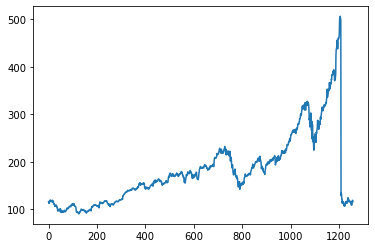

In [61]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [62]:
import numpy as np

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [66]:
print(df1)

[[0.06198437]
 [0.0610463 ]
 [0.05291642]
 ...
 [0.06900782]
 [0.06819002]
 [0.06248948]]


In [67]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [68]:
training_size,test_size

(817, 441)

In [69]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [70]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [71]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [72]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [73]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [75]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [76]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [77]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Train on 716 samples, validate on 340 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
716/716 [==============================] - 24s 34ms/sample - loss: 0.0096 - val_loss: 0.0472
Epoch 2/100
716/716 [==============================] - 17s 24ms/sample - loss: 0.0021 - val_loss: 0.0195
Epoch 3/100
716/716 [==============================] - 17s 24ms/sample - loss: 6.9297e-04 - val_loss: 0.0250
Epoch 4/100
716/716 [==============================] - 19s 26ms/sample - loss: 4.9046e-04 - val_loss: 0.0186
Epoch 5/100
716/716 [==============================] - 20s 28ms/sample - loss: 3.5196e-04 - val_loss: 0.0176
Epoch 6/100
716/716 [==============================] - 18s 26ms/sample - loss: 3.1651e-04 - val_loss: 0.0175
Epoch 7/100
716/716 [==============================] - 19s 27ms/sample - loss: 3.0701e-04 - val_loss: 0.0167
Epoch 8/100
716/716 [==============================] - 19s 27ms/sample - loss: 2.8887e-04 - val_loss: 0.0

716/716 [==============================] - 16s 23ms/sample - loss: 1.2761e-04 - val_loss: 0.0090
Epoch 73/100
716/716 [==============================] - 16s 22ms/sample - loss: 1.2093e-04 - val_loss: 0.0091
Epoch 74/100
716/716 [==============================] - 18s 25ms/sample - loss: 1.2151e-04 - val_loss: 0.0092
Epoch 75/100
716/716 [==============================] - 16s 23ms/sample - loss: 1.2877e-04 - val_loss: 0.0092
Epoch 76/100
716/716 [==============================] - 16s 23ms/sample - loss: 1.4358e-04 - val_loss: 0.0085
Epoch 77/100
716/716 [==============================] - 16s 23ms/sample - loss: 1.3742e-04 - val_loss: 0.0086
Epoch 78/100
716/716 [==============================] - 16s 23ms/sample - loss: 1.1834e-04 - val_loss: 0.0088
Epoch 79/100
716/716 [==============================] - 18s 25ms/sample - loss: 1.1887e-04 - val_loss: 0.0088
Epoch 80/100
716/716 [==============================] - 18s 26ms/sample - loss: 1.2075e-04 - val_loss: 0.0085
Epoch 81/100
716/716 [=

In [79]:
import tensorflow as tf

In [80]:
tf.__version__

'1.14.0'

In [81]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [82]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [83]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

159.38810074405959

In [84]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

281.4411473422175

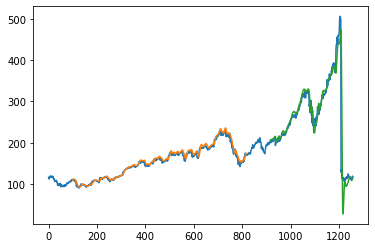

In [85]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [89]:
len(test_data)

441

In [90]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [94]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [96]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.05853318]
101
1 day input [0.64589296 0.6643175  0.64875526 0.66025256 0.63328924 0.65289236
 0.66015634 0.65849669 0.65849669 0.68192423 0.6791341  0.70001203
 0.7039567  0.70556825 0.70131088 0.71651233 0.72293446 0.711365
 0.70948888 0.72901984 0.71595911 0.71858088 0.67598316 0.67377029
 0.69488876 0.67990379 0.69710162 0.70816597 0.80505111 0.83081179
 0.83781118 0.8416356  0.87858088 0.85173782 0.86727601 0.83502105
 0.86999399 0.88923632 0.88825015 0.8853638  0.89455201 0.89594708
 0.92064943 0.97929044 0.99360192 0.98366807 1.         0.98544799
 0.9834997  0.09308479 0.10544799 0.09876127 0.07345761 0.07365003
 0.05407096 0.06489477 0.0556825  0.05209862 0.06016837 0.06061335
 0.0524113  0.04810583 0.03968731 0.04748046 0.05164161 0.04036079
 0.04300661 0.0527721  0.05921828 0.05712568 0.06126278 0.06361996
 0.05455201 0.06292243 0.05488876 0.05950692 0.05924233 0.06405292
 0.08192423 0.07398677 0.07420325 0.07304871 0.06898376 0.06167168
 0.06535177 0.06381239 0.06111846 0

8 day output [[0.06746416]]
9 day input [0.65849669 0.68192423 0.6791341  0.70001203 0.7039567  0.70556825
 0.70131088 0.71651233 0.72293446 0.711365   0.70948888 0.72901984
 0.71595911 0.71858088 0.67598316 0.67377029 0.69488876 0.67990379
 0.69710162 0.70816597 0.80505111 0.83081179 0.83781118 0.8416356
 0.87858088 0.85173782 0.86727601 0.83502105 0.86999399 0.88923632
 0.88825015 0.8853638  0.89455201 0.89594708 0.92064943 0.97929044
 0.99360192 0.98366807 1.         0.98544799 0.9834997  0.09308479
 0.10544799 0.09876127 0.07345761 0.07365003 0.05407096 0.06489477
 0.0556825  0.05209862 0.06016837 0.06061335 0.0524113  0.04810583
 0.03968731 0.04748046 0.05164161 0.04036079 0.04300661 0.0527721
 0.05921828 0.05712568 0.06126278 0.06361996 0.05455201 0.06292243
 0.05488876 0.05950692 0.05924233 0.06405292 0.08192423 0.07398677
 0.07420325 0.07304871 0.06898376 0.06167168 0.06535177 0.06381239
 0.06111846 0.0594107  0.05943476 0.06316296 0.05017438 0.06008419
 0.044546   0.04432952 0

16 day output [[0.0732554]]
17 day input [0.72293446 0.711365   0.70948888 0.72901984 0.71595911 0.71858088
 0.67598316 0.67377029 0.69488876 0.67990379 0.69710162 0.70816597
 0.80505111 0.83081179 0.83781118 0.8416356  0.87858088 0.85173782
 0.86727601 0.83502105 0.86999399 0.88923632 0.88825015 0.8853638
 0.89455201 0.89594708 0.92064943 0.97929044 0.99360192 0.98366807
 1.         0.98544799 0.9834997  0.09308479 0.10544799 0.09876127
 0.07345761 0.07365003 0.05407096 0.06489477 0.0556825  0.05209862
 0.06016837 0.06061335 0.0524113  0.04810583 0.03968731 0.04748046
 0.05164161 0.04036079 0.04300661 0.0527721  0.05921828 0.05712568
 0.06126278 0.06361996 0.05455201 0.06292243 0.05488876 0.05950692
 0.05924233 0.06405292 0.08192423 0.07398677 0.07420325 0.07304871
 0.06898376 0.06167168 0.06535177 0.06381239 0.06111846 0.0594107
 0.05943476 0.06316296 0.05017438 0.06008419 0.044546   0.04432952
 0.04834636 0.05919423 0.06900782 0.06819002 0.06248948 0.05853318
 0.06114216 0.06294128 

25 day output [[0.08112176]]
26 day input [0.67990379 0.69710162 0.70816597 0.80505111 0.83081179 0.83781118
 0.8416356  0.87858088 0.85173782 0.86727601 0.83502105 0.86999399
 0.88923632 0.88825015 0.8853638  0.89455201 0.89594708 0.92064943
 0.97929044 0.99360192 0.98366807 1.         0.98544799 0.9834997
 0.09308479 0.10544799 0.09876127 0.07345761 0.07365003 0.05407096
 0.06489477 0.0556825  0.05209862 0.06016837 0.06061335 0.0524113
 0.04810583 0.03968731 0.04748046 0.05164161 0.04036079 0.04300661
 0.0527721  0.05921828 0.05712568 0.06126278 0.06361996 0.05455201
 0.06292243 0.05488876 0.05950692 0.05924233 0.06405292 0.08192423
 0.07398677 0.07420325 0.07304871 0.06898376 0.06167168 0.06535177
 0.06381239 0.06111846 0.0594107  0.05943476 0.06316296 0.05017438
 0.06008419 0.044546   0.04432952 0.04834636 0.05919423 0.06900782
 0.06819002 0.06248948 0.05853318 0.06114216 0.06294128 0.06412989
 0.06495908 0.06562039 0.0662275  0.06683542 0.06746416 0.06811748
 0.06879371 0.06949058

In [97]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [101]:
len(df1)

1258

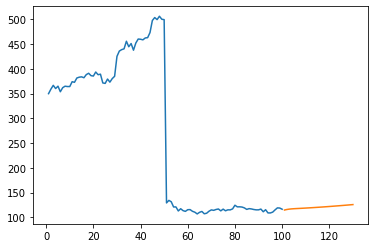

In [104]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

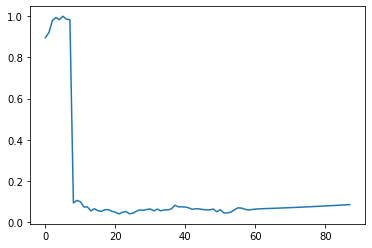

In [105]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [106]:
df3=scaler.inverse_transform(df3).tolist()

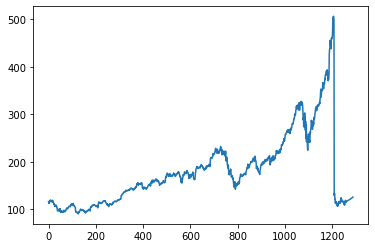

In [107]:
plt.plot(df3)